# Importación de datos y librerías

In [837]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [838]:
df_bmw = pd.read_csv("/content/drive/MyDrive/Nuclio/M3. Data Analytics y Business Intelligence/Entregable 1/bmw_pricing_v3.csv")

In [839]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [840]:
#podemos ver que no tenemos filas duplicadas
df_bmw[df_bmw.duplicated(keep = False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


# Paso 1. Columnas eliminadas
¿Qué columnas eliminaron inicialmente del dataset y por qué?


> *R: Inicialmente podemos ver que hay una columna llamada 'marca' que no tiene mucho sentido ya que la base de datos es de la marca BMW, por si acaso vemos los valores que se encuentran dentro, y efectivamente solo existe un tipo de dato llamado 'bmw' así que la eliminamos*



In [841]:
#La columna 'marca' no tiene sentido ya que la base de datos es de BMW, pero para asegurarnos haremos la siguiente función
df_bmw['marca'].value_counts()

BMW    3873
Name: marca, dtype: int64

In [842]:
del df_bmw['marca']

# Paso 2 Nulos

Manejo de nulos, explicar qué se hizo con los nulos por cada columna



>*R: primero observé que la mayoría de columnas tenían un
porcentaje muy bajo de nulos (menos de un 0.2%), por lo que decidí eliminar esas filas, ya que, al ser un porcentaje tan bajo, no debería de afectar al modelo.*

>*Luego eliminé 2 columnas que contenían un porcentaje demasiado alto de nulos como para considerarlas, ya que podrían afectar al modelo si nos inventamos esos datos. Estas columnas son: la columna asientos_traseros_plegables con un 70% nulos, y la columna fecha_registro con un 50% (creo que podría tener relación con el precio pero el porcentaje de nulos me parece demasiado como para conservarla).*

>*Por otro lado, con las otras 5 columnas que nos quedan, he decidido sustituir los valores nulos por 'sin datos'*



##Columnas con nulos que constituyan menos de un 0.2%

In [843]:
df_bmw1 = df_bmw.copy()

In [844]:
#Vemos el porcentaje de nulos que hay en cada columna
df_bmw1.isnull().sum() / len(df_bmw) * 100

modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

In [845]:
#Observamos que la mayoría de columnas tienen un porcentaj menor al 0.2% de nulos,
#por lo que si eliminamos los nulos de esas columnas apenas afectaría al modelo

for i in df_bmw1:
  if (df_bmw1[i].isnull().sum() / len(df_bmw1) * 100) < 0.2:
    df_bmw1.dropna(subset=[i], inplace = True)

In [846]:
df_bmw2 = df_bmw1.copy()

In [847]:
#Calculamos el porcentaje total de datos eliminados

(len(df_bmw1) - len(df_bmw2)) / len(df_bmw2) * 100

0.0

In [848]:
#comprobamos
df_bmw2.isnull().sum() / len(df_bmw2) * 100

modelo                          0.000000
km                              0.000000
potencia                        0.000000
fecha_registro                 50.010380
tipo_gasolina                   0.000000
color                           9.175836
tipo_coche                     30.080963
volante_regulable               0.000000
aire_acondicionado             10.006228
camara_trasera                  0.000000
asientos_traseros_plegables    70.022836
elevalunas_electrico            0.000000
bluetooth                      15.050862
gps                             0.000000
alerta_lim_velocidad           15.050862
precio                          0.000000
fecha_venta                     0.000000
dtype: float64

## Columnas con más de 50% de nulos


###asientos_traseros_plegables

In [849]:
df_bmw2['asientos_traseros_plegables'].isnull().sum()/ len(df_bmw2) * 100

70.02283578991073

In [850]:
#tiene un 70% de nulos. Muestra no significativa

del df_bmw2['asientos_traseros_plegables']

In [851]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   fecha_registro        2408 non-null   object 
 4   tipo_gasolina         4817 non-null   object 
 5   color                 4375 non-null   object 
 6   tipo_coche            3368 non-null   object 
 7   volante_regulable     4817 non-null   object 
 8   aire_acondicionado    4335 non-null   object 
 9   camara_trasera        4817 non-null   object 
 10  elevalunas_electrico  4817 non-null   object 
 11  bluetooth             4092 non-null   object 
 12  gps                   4817 non-null   bool   
 13  alerta_lim_velocidad  4092 non-null   object 
 14  precio                4817 non-null   float64
 15  fecha_venta          

### fecha_registro

In [852]:
df_bmw2['fecha_registro'].isnull().sum() / len(df_bmw2) * 100

50.01037990450487

In [853]:
#Aunque considero que el precio podría tener cierte relación con la fecha_registro hay demasiados valores nulos
#No podemos inventarnos el 50% de estos, por lo que decido eliminar la columna

df_bmw2.drop('fecha_registro', axis=1, inplace=True)

## Columnas entre 9%-50% de nulos

### color                           

In [854]:
df_bmw2['color'].isnull().sum()/ len(df_bmw2) * 100

9.175835582312644

In [855]:
df_bmw2['color'].value_counts()

black     1489
grey      1067
blue       643
white      480
brown      302
silver     290
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [856]:
df_bmw2['color'].fillna('sin datos', inplace = True)

In [857]:
df_bmw2['color'].isnull().sum()

0

### tipo_coche  

In [858]:
df_bmw2['tipo_coche'].isnull().sum()/ len(df_bmw2) * 100

30.080963255138055

In [859]:
# Un 30% es una cantidad de datos muy grande de los datos como para arriesgrarnos, pondremos 'sin datos'

In [860]:
df_bmw2['tipo_coche'].value_counts()

estate         1097
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: tipo_coche, dtype: int64

In [861]:
df_bmw2['tipo_coche'].mode()

0    estate
Name: tipo_coche, dtype: object

In [862]:
df_bmw2['tipo_coche'].fillna('sin datos', inplace = True)

In [863]:
df_bmw2['tipo_coche'].isnull().sum()

0

### aire_acondicionado  

In [864]:
df_bmw2['aire_acondicionado'].isnull().sum()/ len(df_bmw2) * 100

10.006227942702928

In [865]:
df_bmw2['aire_acondicionado'].value_counts()

True     3449
False     886
Name: aire_acondicionado, dtype: int64

In [866]:
df_bmw2['aire_acondicionado'].fillna('sin datos', inplace = True)

In [867]:
df_bmw2['aire_acondicionado'].isnull().sum()

0

### bluetooth                      

In [868]:
df_bmw2['bluetooth'].isnull().sum()/ len(df_bmw2) * 100

15.050861532073906

In [869]:
df_bmw2['bluetooth'].value_counts()

False    3101
True      991
Name: bluetooth, dtype: int64

In [870]:
df_bmw2['bluetooth'].fillna('sin datos', inplace = True)

In [871]:
df_bmw2['bluetooth'].isnull().sum()

0

### alerta_lim_velocidad

In [872]:
df_bmw2['alerta_lim_velocidad'].isnull().sum()/ len(df_bmw2) * 100

15.050861532073906

In [873]:
df_bmw2['alerta_lim_velocidad'].value_counts()

True     2226
False    1866
Name: alerta_lim_velocidad, dtype: int64

In [874]:
df_bmw2['alerta_lim_velocidad'].fillna('sin datos', inplace = True)

In [875]:
df_bmw2['alerta_lim_velocidad'].isnull().sum()

0

Comprobamos que hemos eliminado todos los nulos

In [876]:
df_bmw2.isnull().sum() / len(df_bmw2) * 100

modelo                  0.0
km                      0.0
potencia                0.0
tipo_gasolina           0.0
color                   0.0
tipo_coche              0.0
volante_regulable       0.0
aire_acondicionado      0.0
camara_trasera          0.0
elevalunas_electrico    0.0
bluetooth               0.0
gps                     0.0
alerta_lim_velocidad    0.0
precio                  0.0
fecha_venta             0.0
dtype: float64

# Paso 3 Análisis univariable

Análisis univariable, explicar alguna información interesante encontrada


> R: categóricas
1. En modelo, tipo_gasolina y color hay valores que se repiten poco, los agruparemos en 'otros'
2. tipo_coche la dejaré como está
3. fecha_venta eliminaremos la columna ya que solo hay 4 ventas que no suceden en 2018

> R: boleanas
1. En bool_gpsel 93% de los valores son F solo un 7% son T. Podemos eliminar esta columna.
2. El resto de datos me parecen suficientemente representativos

> R: numéricas
1. En la columna 'km' hemos encontrado outliers por encima del valor 0.4e+06, los hemos sustituido por la mediana(calculada sin outliers)
2. En potencia he encontrado muchos outliers por encima de 200 pero considero que eliminarlos afectaría al modelo, ya que si es posible que un coche tenga 300CV de potencia. Y en el caso de tener esa potencia, tendría sentido que exisitiese una relación con el precioEn potencia he encontrado otros por debajo de 50 y unos cuantos más por encima de 200 los cuales he sustituido por la mediana

In [877]:
df_bmw3 = df_bmw2.copy()

In [878]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   object 
 7   aire_acondicionado    4817 non-null   object 
 8   camara_trasera        4817 non-null   object 
 9   elevalunas_electrico  4817 non-null   object 
 10  bluetooth             4817 non-null   object 
 11  gps                   4817 non-null   bool   
 12  alerta_lim_velocidad  4817 non-null   object 
 13  precio                4817 non-null   float64
 14  fecha_venta           4817 non-null   object 
dtypes: bool(1), float64(3

## Convertimos los valores True y False a int

In [879]:
#Teniendo en cuenta que tenemos valores llamados 'sin datos', los valores unicos de los bool serán 3 (True, False y Nan)
for i in df_bmw2:
  if len(df_bmw2[i].unique())==3:
    print(df_bmw2[i])

#como podemos ver en el input, la función si que recoge las columnas boleanas

0            True
1            True
2           False
3            True
4            True
5            True
6            True
7            True
8           False
9           False
10           True
11           True
12      sin datos
13           True
14           True
15           True
16      sin datos
17          False
18           True
19          False
20          False
21           True
22           True
23           True
24          False
25          False
26           True
27           True
28      sin datos
29           True
30           True
31          False
32           True
33           True
34          False
35          False
36          False
37          False
38           True
39           True
40      sin datos
41          False
42           True
43           True
44          False
45           True
46          False
47          False
48          False
49      sin datos
50           True
51          False
52          False
53          False
54           True
55        

In [880]:
#True == 1 False == 0 sin datos == 0.5

df_bmw3['bool_bluetooth'] = np.where(df_bmw3['bluetooth'] == True, 1,
                                np.where(df_bmw3['bluetooth'] == False, 0,
                                         np.where(df_bmw3['bluetooth'] == 'Sin datos', 0.5, 0.5)))

In [881]:
df_bmw3['bluetooth']

0       sin datos
1            True
2           False
3            True
4            True
5            True
6            True
7            True
8       sin datos
9           False
10          False
11          False
12           True
13           True
14          False
15          False
16          False
17          False
18      sin datos
19          False
20           True
21      sin datos
22      sin datos
23      sin datos
24          False
25          False
26      sin datos
27           True
28           True
29          False
30           True
31           True
32          False
33      sin datos
34          False
35           True
36           True
37          False
38          False
39          False
40          False
41           True
42          False
43          False
44           True
45          False
46           True
47          False
48          False
49          False
50          False
51          False
52          False
53          False
54           True
55        

In [882]:
df_bmw3['bool_bluetooth']

0       0.5
1       1.0
2       0.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       0.5
9       0.0
10      0.0
11      0.0
12      1.0
13      1.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.5
19      0.0
20      1.0
21      0.5
22      0.5
23      0.5
24      0.0
25      0.0
26      0.5
27      1.0
28      1.0
29      0.0
30      1.0
31      1.0
32      0.0
33      0.5
34      0.0
35      1.0
36      1.0
37      0.0
38      0.0
39      0.0
40      0.0
41      1.0
42      0.0
43      0.0
44      1.0
45      0.0
46      1.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      1.0
55      1.0
56      0.5
57      1.0
58      0.5
59      0.0
60      1.0
61      0.0
62      1.0
64      0.0
65      1.0
67      1.0
68      1.0
69      1.0
70      1.0
71      0.0
72      1.0
73      0.0
74      1.0
75      0.0
76      0.0
77      0.0
78      1.0
79      1.0
80      0.0
81      1.0
83      1.0
84      1.0
85      0.0
86  

In [883]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==3:
    print(i)

aire_acondicionado
bluetooth
alerta_lim_velocidad
bool_bluetooth


In [884]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==3:
    df_bmw3['bool_' + i] = np.where(df_bmw3[i] == True, 1,
                                np.where(df_bmw3[i] == False, 0,
                                         np.where(df_bmw3[i] == 'Sin datos', 0.5, 0.5)))
    del df_bmw3[i]

In [885]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,camara_trasera,elevalunas_electrico,gps,precio,fecha_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth
0,118,140411.0,100.0,diesel,black,sin datos,True,False,True,True,11300.0,2018-01-01,1.0,0.5,0.5
1,M4,13929.0,317.0,petrol,grey,convertible,True,False,False,True,69700.0,2018-02-01,1.0,1.0,1.0
2,320,183297.0,120.0,diesel,white,sin datos,False,False,True,True,10200.0,2018-02-01,0.0,0.0,0.0
3,420,128035.0,135.0,diesel,red,convertible,True,False,True,True,25100.0,2018-02-01,1.0,0.5,1.0
4,425,97097.0,160.0,diesel,silver,sin datos,True,False,False,True,33400.0,2018-04-01,1.0,1.0,1.0


A continuación hacemos lo mismo con las columnas que solo tengan los valores True y False

In [886]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==2:
    print(i)

volante_regulable
camara_trasera
elevalunas_electrico
gps


In [887]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==2:
    df_bmw3['bool_' + i] = np.where(df_bmw3[i] == True, 1,
                                np.where(df_bmw3[i] == False, 0, 0))
    del df_bmw3[i]

In [888]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,fecha_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,bool_gps
0,118,140411.0,100.0,diesel,black,sin datos,11300.0,2018-01-01,1.0,0.5,0.5,1,0,1,1
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,2018-02-01,1.0,1.0,1.0,1,0,0,1
2,320,183297.0,120.0,diesel,white,sin datos,10200.0,2018-02-01,0.0,0.0,0.0,0,0,1,1
3,420,128035.0,135.0,diesel,red,convertible,25100.0,2018-02-01,1.0,0.5,1.0,1,0,1,1
4,425,97097.0,160.0,diesel,silver,sin datos,33400.0,2018-04-01,1.0,1.0,1.0,1,0,0,1


## Dividimos los tipos de datos en listas


In [889]:
lista_kind=['i','f', 'u']

In [890]:
target = ['precio']

def obtener_lista_variables(dataset):
  lista_num = []
  lista_bool = []
  lista_cat = []

  for i in dataset:
    if (dataset[i].dtype.kind in lista_kind) and \
    len(dataset[i].unique()) > 3 and i not in target:
      lista_num.append(i)

    elif (dataset[i].dtype.kind in lista_kind) and \
    len(dataset[i].unique()) <= 3 and i not in target:
      lista_bool.append(i)

    elif (dataset[i].dtype.kind == 'O') and i not in target:
      lista_cat.append(i)

  return lista_num, lista_bool, lista_cat

In [891]:
l_num, l_bool, l_cat = obtener_lista_variables(df_bmw3)

In [892]:
l_num

['km', 'potencia']

In [893]:
l_bool

['bool_aire_acondicionado',
 'bool_alerta_lim_velocidad',
 'bool_bool_bluetooth',
 'bool_volante_regulable',
 'bool_camara_trasera',
 'bool_elevalunas_electrico',
 'bool_gps']

In [894]:
l_cat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta']

##Datos categóricos

> 1. ***En modelo, tipo_gasolina y color*** hay valores que se repiten poco, los agruparemos en 'otros'
2. ***tipo_coche*** la dejaré como está
5. ***fecha_venta*** eliminaremos la columna ya que solo hay 4 ventas que no suceden en 2018



In [895]:
df_bmw4 = df_bmw3.copy()

In [896]:
for i in l_cat:
  print(i, df_bmw4[i].value_counts(), '\n')

modelo 320                  747
520                  630
318                  562
X3                   437
116                  358
X1                   274
316                  233
X5                   231
525                  182
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   42
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
X6 M                   8
418 Gran Coupé         8
640                    7
M3                     7
335                    7
435 Gran Coupé         6
Z4                

###**modelo**

In [897]:
pd.set_option("display.max_rows", None)  #usamos esta función para que nos aparezca la lista completa

df_bmw4['modelo'].value_counts()

320                  747
520                  630
318                  562
X3                   437
116                  358
X1                   274
316                  233
X5                   231
525                  182
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   42
120                   36
420 Gran Coupé        33
330                   33
730                   33
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
X6 M                   8
418 Gran Coupé         8
640                    7
M3                     7
335                    7
435 Gran Coupé         6
Z4                     6


In [898]:
conteo_valores = df_bmw4['modelo'].value_counts()

In [899]:
#seleccionamos solo los valores que se repiten menos de 20 veces

valores_menos_20veces = conteo_valores[conteo_valores < 20]

In [900]:
# Cambiamos los valores que aparezcan menos de 20 veces por 'otros_modelos'

df_bmw4['modelo'] = df_bmw4['modelo'].apply(lambda x: 'otros_modelos' if x in valores_menos_20veces else x)

###**Tipo gasolina**

In [901]:
df_bmw4['tipo_gasolina'] = np.where((df_bmw4['tipo_gasolina'] == 'hybrid_petrol') |
                                     (df_bmw4['tipo_gasolina'] == 'electro'),
                                    'otras_gasolinas',  df_bmw4['tipo_gasolina'])


In [902]:
# Diesel tiene dos nombres uno con mayúscula y otro con minúscula

df_bmw4['tipo_gasolina'] = np.where(df_bmw4['tipo_gasolina'] == 'Diesel',
                                    'diesel',  df_bmw4['tipo_gasolina'])

In [903]:
df_bmw4['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'otras_gasolinas'], dtype=object)

###**Color**

In [904]:
df_bmw4['color'] = np.where((df_bmw4['color'] == 'red') |
                            (df_bmw4['color'] == 'beige')|
                            (df_bmw4['color'] == 'green')|
                            (df_bmw4['color'] == 'orange'),
                                    'otros_colores',  df_bmw4['color'])

In [905]:
df_bmw4['color'].unique()

array(['black', 'grey', 'white', 'otros_colores', 'silver', 'blue',
       'sin datos', 'brown'], dtype=object)

###**Fecha venta**

In [906]:
#solo hay 4 fechas diferentes al 2018 por lo que eliminaremos esta columna, no nos aporta ningún valor
df_bmw4['fecha_venta'].value_counts()

2018-05-01    808
2018-03-01    730
2018-04-01    689
2018-06-01    602
2018-07-01    536
2018-08-01    526
2018-02-01    495
2018-09-01    222
2018-01-01    205
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: fecha_venta, dtype: int64

In [907]:
 df_bmw4.drop('fecha_venta', axis=1, inplace=True)

##Datos bool


> 1. ***En bool_gps*** el 93% de los valores son F solo un 7% son T. Podemos eliminar esta columna.
2. El resto de datos me parecen suficientemente representativos

[[<Axes: title={'center': 'bool_aire_acondicionado'}>]]
[[<Axes: title={'center': 'bool_alerta_lim_velocidad'}>]]
[[<Axes: title={'center': 'bool_bool_bluetooth'}>]]
[[<Axes: title={'center': 'bool_volante_regulable'}>]]
[[<Axes: title={'center': 'bool_camara_trasera'}>]]
[[<Axes: title={'center': 'bool_elevalunas_electrico'}>]]
[[<Axes: title={'center': 'bool_gps'}>]]


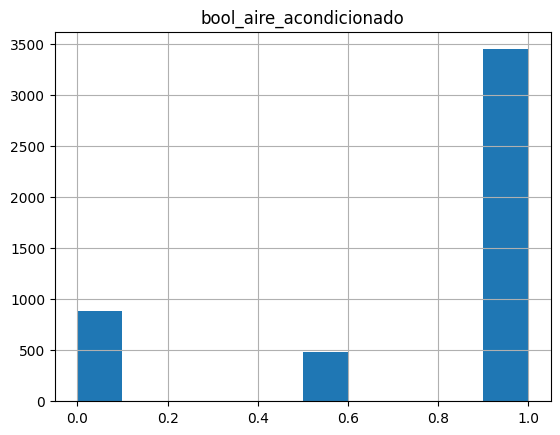

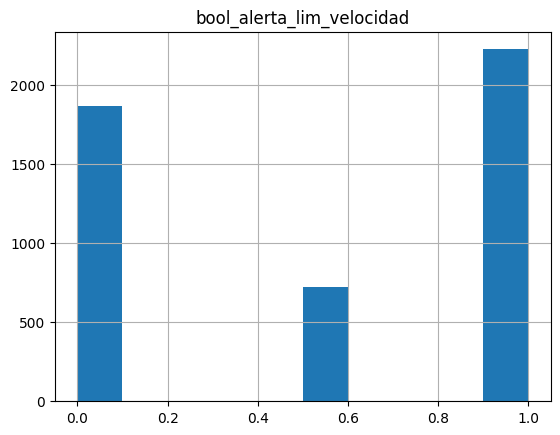

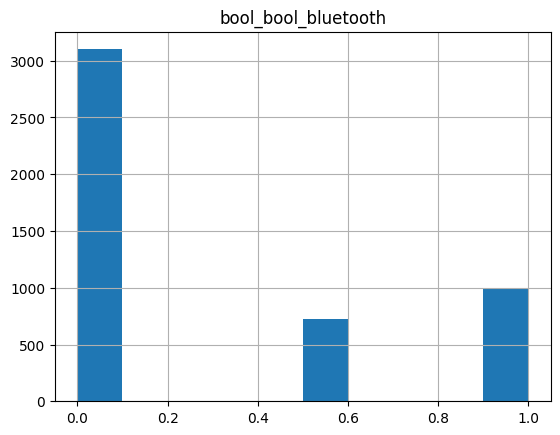

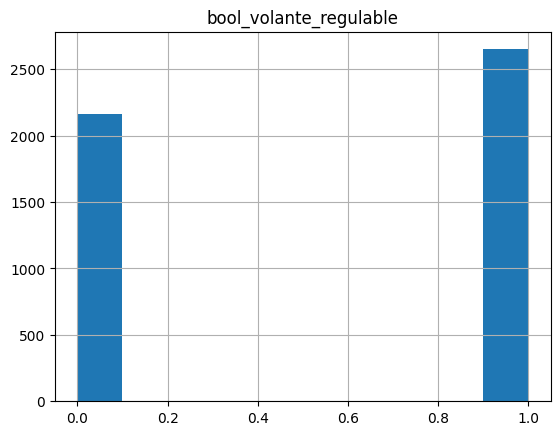

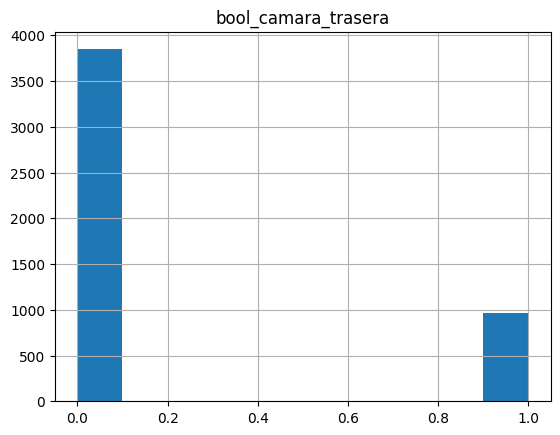

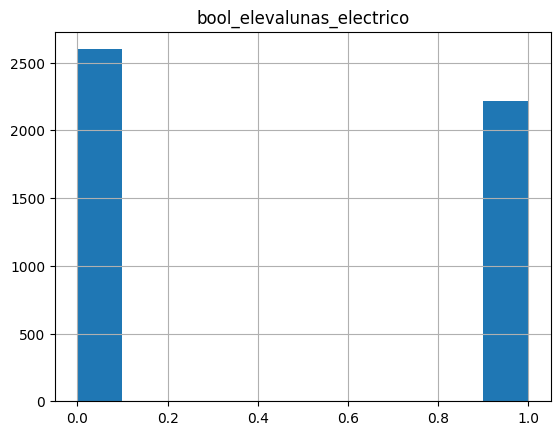

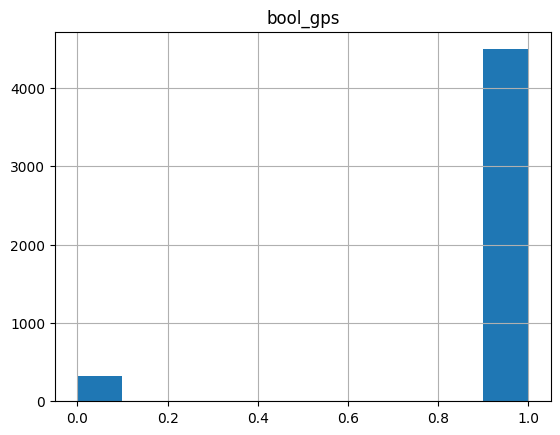

In [908]:
for i in l_bool:
  print(df_bmw4.hist(i))

In [909]:
for i in l_bool:
  print(df_bmw4[i].value_counts() / len(df_bmw4[i]) * 100)

1.0    71.600581
0.0    18.393191
0.5    10.006228
Name: bool_aire_acondicionado, dtype: float64
1.0    46.211335
0.0    38.737804
0.5    15.050862
Name: bool_alerta_lim_velocidad, dtype: float64
0.0    64.376168
1.0    20.572971
0.5    15.050862
Name: bool_bool_bluetooth, dtype: float64
1    55.034254
0    44.965746
Name: bool_volante_regulable, dtype: float64
0    79.862985
1    20.137015
Name: bool_camara_trasera, dtype: float64
0    53.933984
1    46.066016
Name: bool_elevalunas_electrico, dtype: float64
1    93.253062
0     6.746938
Name: bool_gps, dtype: float64


### Gps

In [910]:
del df_bmw4['bool_gps']

In [911]:
df_bmw4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico
0,118,140411.0,100.0,diesel,black,sin datos,11300.0,1.0,0.5,0.5,1,0,1
1,otros_modelos,13929.0,317.0,petrol,grey,convertible,69700.0,1.0,1.0,1.0,1,0,0
2,320,183297.0,120.0,diesel,white,sin datos,10200.0,0.0,0.0,0.0,0,0,1
3,420,128035.0,135.0,diesel,otros_colores,convertible,25100.0,1.0,0.5,1.0,1,0,1
4,otros_modelos,97097.0,160.0,diesel,silver,sin datos,33400.0,1.0,1.0,1.0,1,0,0


##Datos numéricos


> 1. ***En la columna 'km'*** hemos encontrado outliers por encima del valor 0.4e+06, los hemos sustituido por la mediana(calculada sin outliers)
2. ***En potencia*** he encontrado muchos outliers por encima de 200 pero considero que eliminarlos afectaría al modelo, ya que si es posible que un coche tenga 300CV de potencia. Y en el caso de tener esa potencia, tendría sentido que exisitiese una relación con el precio



[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]


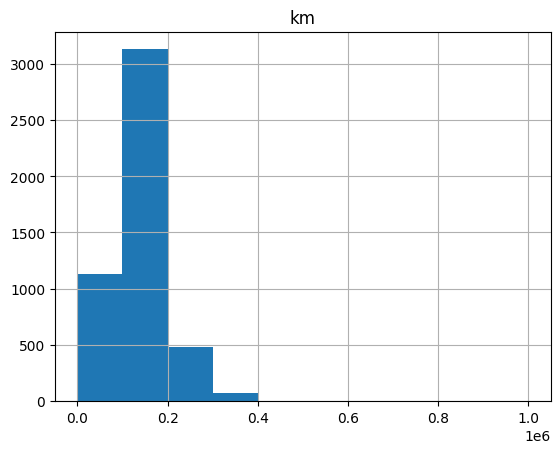

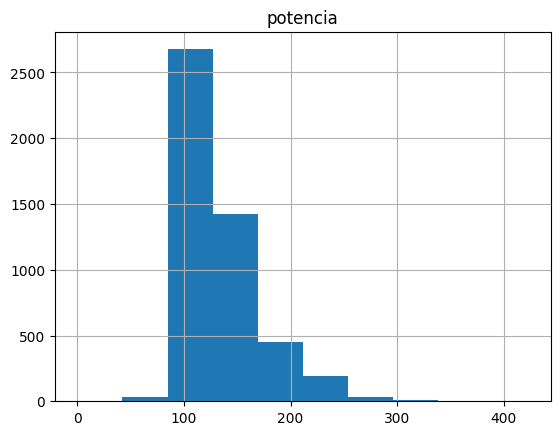

In [912]:
for i in l_num:
    print(df_bmw4.hist(i))

### km


<Axes: xlabel='km'>

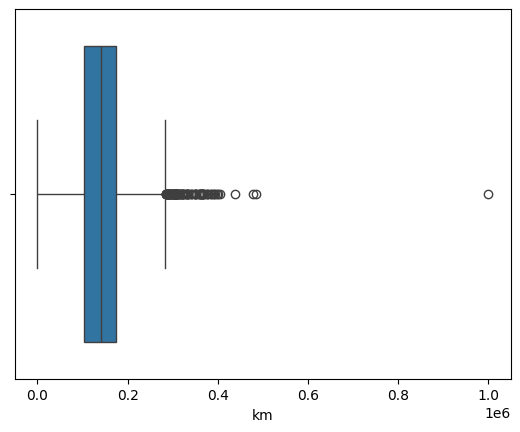

In [913]:
sns.boxplot(x=df_bmw4['km'])

In [914]:
df_bmw4[df_bmw4['km'] > (0.4e+06)]  #vemos que son pocos outliers

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico
557,520,484615.0,120.0,diesel,blue,estate,8300.0,1.0,0.0,0.5,1,0,0
1573,320,400654.0,110.0,diesel,black,estate,1800.0,0.0,0.0,0.0,0,1,0
2350,318,477571.0,85.0,diesel,grey,sin datos,1200.0,1.0,0.0,1.0,0,0,0
2829,525,439060.0,105.0,diesel,silver,sin datos,100.0,0.0,0.0,0.0,0,1,0
3198,320,405816.0,100.0,diesel,blue,sedan,500.0,0.0,0.0,0.5,0,0,0
3732,118,1000376.0,90.0,diesel,sin datos,sin datos,1400.0,0.0,0.0,0.5,1,0,0


In [915]:
#susituimos por la mediana. Calculando ésta excluyendo los outliers

df_bmw4['km'] = np.where(df_bmw4['km'] > (0.4e+06), df_bmw4['km'].median(), df_bmw4['km'])

### Potencia

<Axes: xlabel='potencia'>

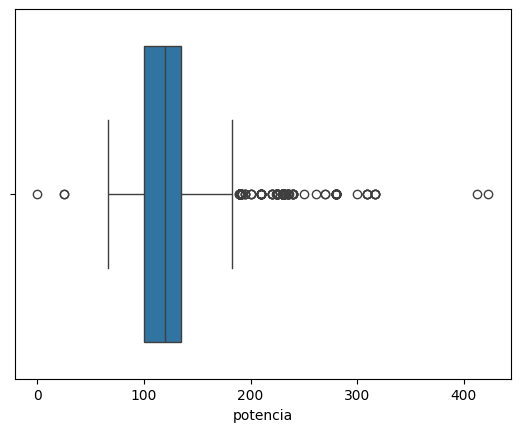

In [916]:
sns.boxplot(x=df_bmw4['potencia'])

In [917]:
df_bmw4.precio.min()

100.0

In [918]:
df_bmw4[df_bmw4['potencia'] < 50]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico
1796,otros_modelos,152328.0,25.0,otras_gasolinas,black,sin datos,20300.0,1.0,0.5,0.0,0,0,0
1925,otros_modelos,152470.0,25.0,otras_gasolinas,black,hatchback,15500.0,1.0,1.0,0.0,0,0,0
3765,X1,81770.0,0.0,diesel,white,suv,11700.0,0.0,0.5,0.0,0,0,0


In [919]:
# Aunque parece que por encima de 200 ya encontramos outliers, lo cierto es que si es posible que lleguen a esa potencia
# No los eliminaremos

df_bmw4[df_bmw4['potencia'] > 300]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico
1,otros_modelos,13929.0,317.0,petrol,grey,convertible,69700.0,1.0,1.0,1.0,1,0,0
67,otros_modelos,29925.0,309.0,petrol,silver,sin datos,47000.0,1.0,1.0,1.0,1,0,1
72,otros_modelos,69410.0,317.0,petrol,white,sin datos,53600.0,1.0,1.0,1.0,1,0,0
73,otros_modelos,170550.0,309.0,petrol,grey,coupe,28000.0,1.0,1.0,0.0,1,0,1
93,otros_modelos,99283.0,309.0,petrol,silver,sin datos,28600.0,0.0,1.0,0.0,0,0,1
139,otros_modelos,169970.0,309.0,petrol,grey,coupe,35700.0,1.0,1.0,0.0,1,0,1
2944,otros_modelos,33670.0,317.0,petrol,blue,sedan,51200.0,1.0,1.0,1.0,1,0,0
3092,otros_modelos,39250.0,317.0,petrol,black,sedan,52400.0,1.0,1.0,1.0,1,0,0
3601,otros_modelos,150187.0,412.0,petrol,white,sedan,41600.0,1.0,1.0,1.0,1,1,1
4146,otros_modelos,2970.0,423.0,petrol,otros_colores,suv,82400.0,0.5,1.0,0.0,1,1,0


In [920]:
#Cremos un df sin incluir los outliers para hacer una mediana más precisa

df_sin_outliers = df_bmw4[df_bmw4['potencia']>=50]

In [921]:
#Sustituimos los outliers por la mediana del df sin outliers

df_bmw4['potencia'] = np.where((df_bmw4['potencia']<50),
                         df_sin_outliers['potencia'].median(),
                         df_bmw4['potencia'])

# Paso 4 Análisis de correlación

Análisis de correlación inicial, ¿Hay alguna variable correlacionada?


> 1. Potencia: tiene un 0.64 de correlación con el precio.
2. Alerta límite de velocidad: 0.41 de corr con el precio.
3. La potencia y la alerta de límite de velocidad tienen un 0.46 de correlación por lo que podríamos suponer que la alerta tiene relación con el precio porque tiene correlación con la potencia


In [922]:
corr = df_bmw4.corr(numeric_only = True)

In [923]:
corr.style.background_gradient(cmap='Oranges')

,km,potencia,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico
km,1.000000,-0.045626,-0.412071,0.018966,-0.028708,-0.027370,0.068841,0.001069,0.056484
potencia,-0.045626,1.000000,0.640571,0.179240,0.458609,0.212460,0.326322,0.312779,0.341576
precio,-0.412071,0.640571,1.000000,0.229366,0.411628,0.193180,0.267823,0.251620,0.260994
bool_aire_acondicionado,0.018966,0.179240,0.229366,1.000000,0.192913,0.110718,0.290900,0.130433,0.260549
bool_alerta_lim_velocidad,-0.028708,0.458609,0.411628,0.192913,1.000000,0.101907,0.201188,0.178357,0.316981
bool_bool_bluetooth,-0.027370,0.212460,0.193180,0.110718,0.101907,1.000000,0.125680,0.137178,0.236247
bool_volante_regulable,0.068841,0.326322,0.267823,0.290900,0.201188,0.125680,1.000000,0.253047,0.277784
bool_camara_trasera,0.001069,0.312779,0.251620,0.130433,0.178357,0.137178,0.253047,1.000000,0.198531
bool_elevalunas_electrico,0.056484,0.341576,0.260994,0.260549,0.316981,0.236247,0.277784,0.198531,1.000000


# Paso 5 Análisis variable

Análisis variable vs target, ¿Hay algún insight interesante?

>
1. **Km:** Se puede ver claramente una relación inversamente proporcinal. Cuantos más km tiene menor es el precio
2. **Potencia:** También vemos como a medida que la potencia sube el precio también aunque es menos evidente que el caso anterior
3. **Boleanas:** en las columnas boleanas(es decir las que describen si el coche tiene ciertas comodidades) también parecen tener una pequeña relación, cuando son True (tienen esa comodidad) el violin parece que un poco más alto, aunque en ninguno de ellos es demasiado evidente.


## Análisis target

In [924]:
df_bmw5 = df_bmw4.copy()

<Axes: >

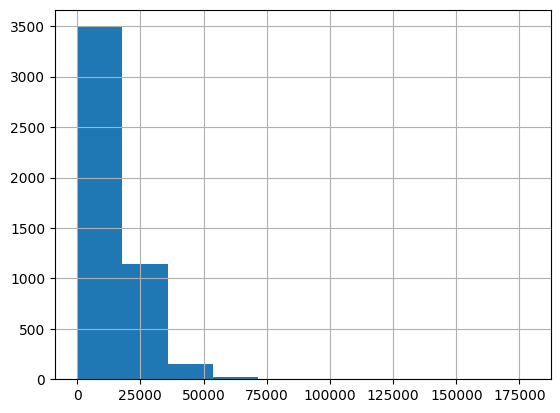

In [925]:
df_bmw5['precio'].hist()

<Axes: xlabel='precio'>

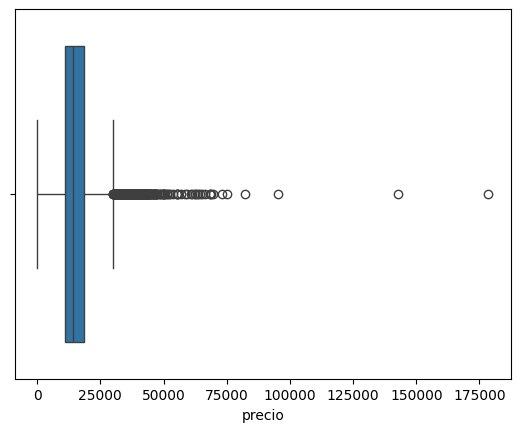

In [926]:
#Aunque nos salga que los precios entre 30000 y 180000 son outliers, considero que son precios posibles para una coche
sns.boxplot(x=df_bmw5['precio'])

In [965]:
#Es posible que estos datos sean ciertos,
#pero podrían perjudicar al modelo por lo que filtraremos que el precio máximo sea 100000

df_bmw5[df_bmw5['precio']>80000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,log_precio
90,otros_modelos,12402.0,170.0,otras_gasolinas,grey,coupe,95200.0,1.0,1.0,0.0,1,0,0,4.978637
4146,otros_modelos,2970.0,423.0,petrol,otros_colores,suv,82400.0,0.5,1.0,0.0,1,1,0,4.915927


In [928]:
df_bmw5[df_bmw5['precio'] < 700]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico
537,320,302006.0,100.0,diesel,sin datos,estate,500.0,0.5,0.0,0.0,0,0,0
565,320,179358.0,120.0,diesel,black,sin datos,100.0,1.0,1.0,0.0,0,0,0
879,318,134156.0,105.0,diesel,grey,estate,100.0,1.0,1.0,0.0,0,0,0
1255,320,170381.0,135.0,diesel,silver,sin datos,100.0,1.0,0.0,0.0,1,0,0
1513,520,358332.0,100.0,diesel,blue,sin datos,400.0,0.0,0.0,0.0,0,0,1
1558,520,358333.0,100.0,diesel,blue,estate,400.0,0.0,0.5,0.5,0,0,1
1832,116,174524.0,85.0,diesel,blue,hatchback,100.0,1.0,0.5,0.0,0,0,0
2473,525,230578.0,85.0,diesel,sin datos,sedan,200.0,0.5,0.5,0.0,0,0,0
2574,525,229880.0,85.0,diesel,black,sedan,200.0,0.5,0.0,0.5,0,0,0
2611,525,230264.0,85.0,diesel,black,sedan,200.0,0.0,0.0,0.0,0,0,0


In [929]:
df_bmw5.drop(df_bmw5[((df_bmw5['precio'] > 80000) | (df_bmw5['precio'] < 700))].index, inplace = True)

In [930]:
df_bmw5['log_precio'] = np.log10(df_bmw5['precio'])

<Axes: >

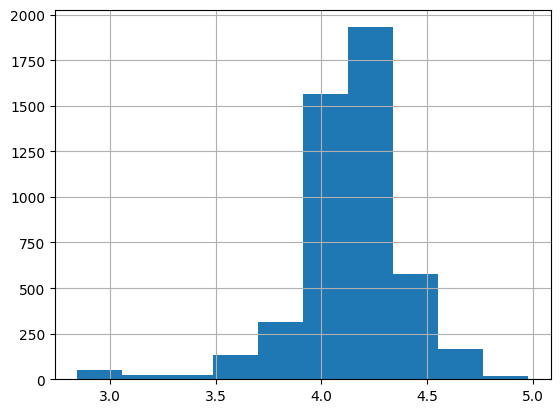

In [931]:
df_bmw5['log_precio'].hist()

<Axes: xlabel='log_precio'>

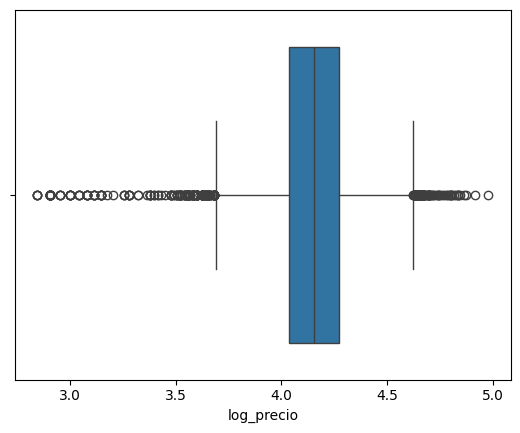

In [932]:
sns.boxplot(x=df_bmw5['log_precio'])

## modelo

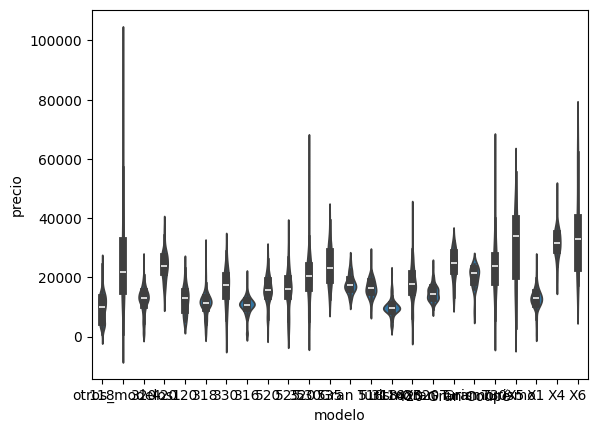

In [933]:
sns.violinplot(x='modelo', y='precio', data=df_bmw5);

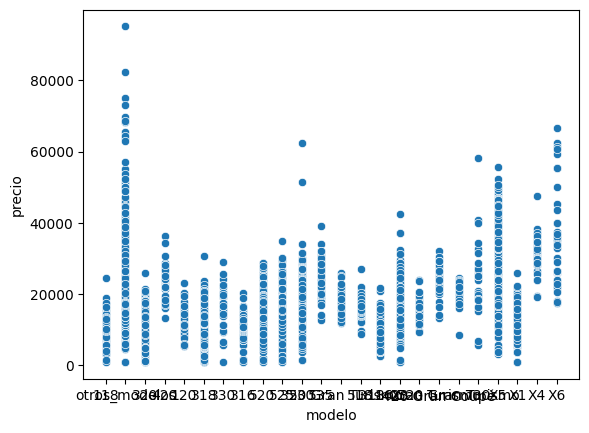

In [934]:
sns.scatterplot(x='modelo', y='precio', data=df_bmw5);

## km -

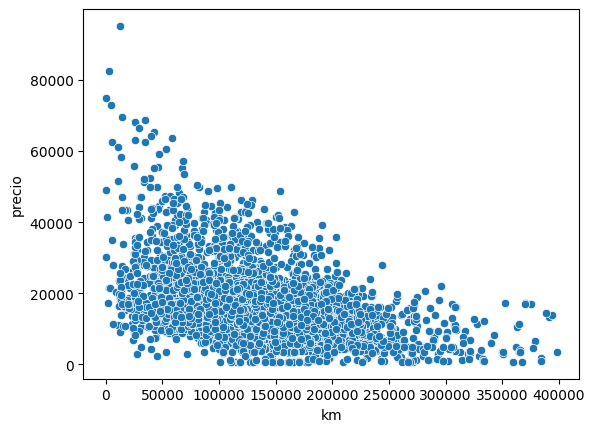

In [935]:
sns.scatterplot(x='km', y='precio',  data=df_bmw5);

## potencia -
parece haber una pequeña relación entre el crecimiento de la potencia y el crecimiento del precio

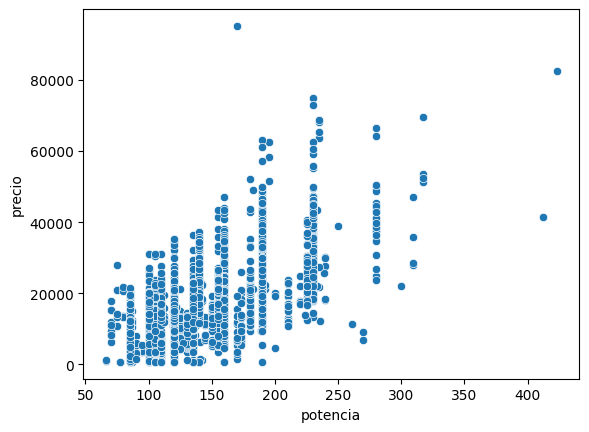

In [936]:
sns.scatterplot(x='potencia', y='precio', data=df_bmw5);

## tipo_gasolina

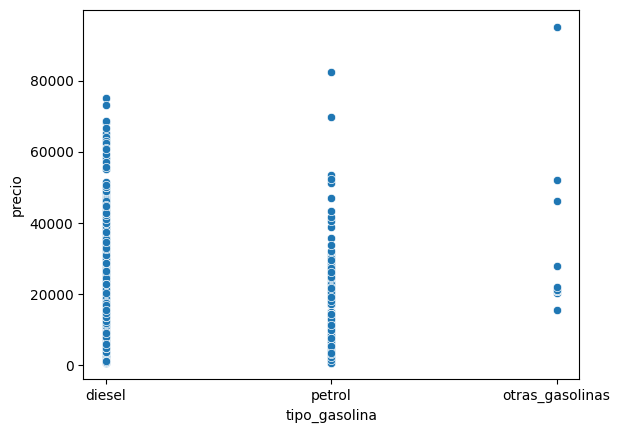

In [937]:
sns.scatterplot(x='tipo_gasolina', y='precio', data=df_bmw5);

## color

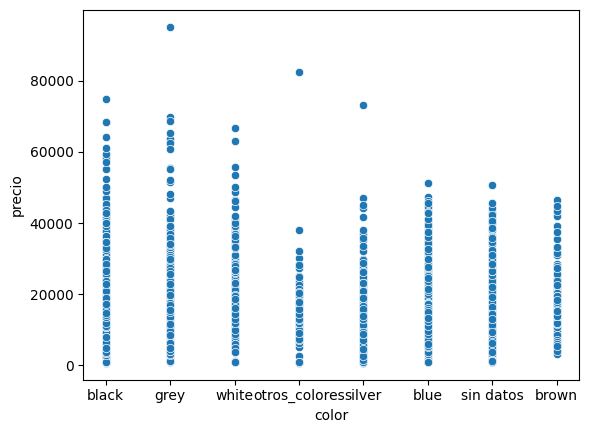

In [938]:
sns.scatterplot(x='color', y='precio', data=df_bmw5);

## tipo_coche

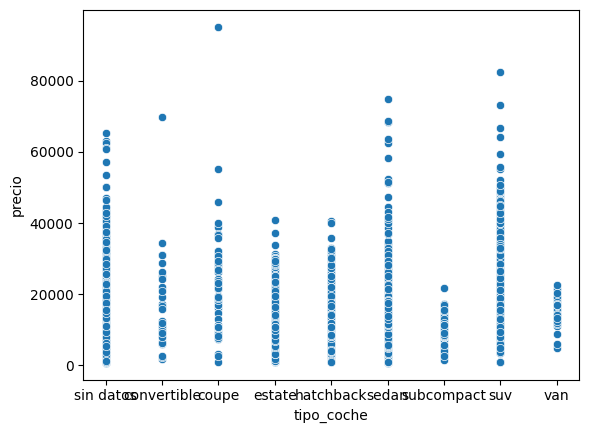

In [939]:
sns.scatterplot(x='tipo_coche', y='precio', data=df_bmw5);

## bool_aire_acondicionado -

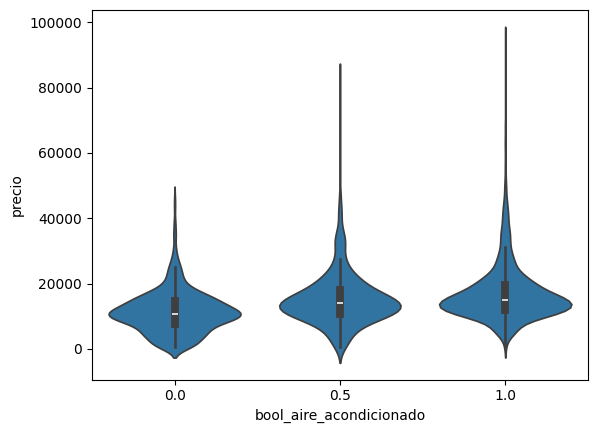

In [940]:
sns.violinplot(x='bool_aire_acondicionado', y='precio', data=df_bmw5);

## bool_alerta_lim_velocidad -

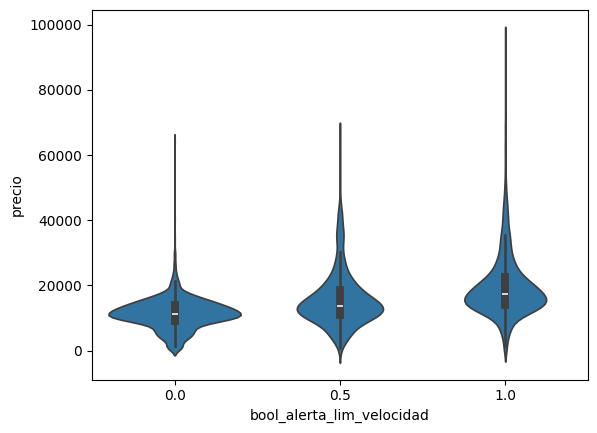

In [941]:
sns.violinplot(x='bool_alerta_lim_velocidad', y='precio', data=df_bmw5);

## bool_bool_bluetooth -

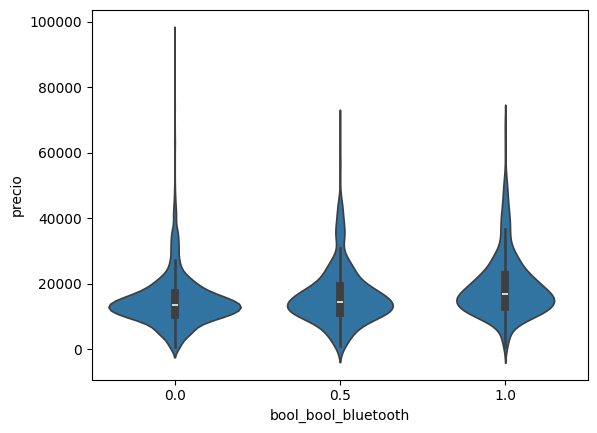

In [942]:
sns.violinplot(x='bool_bool_bluetooth', y='precio', data=df_bmw5);

## bool_volante_regulable -


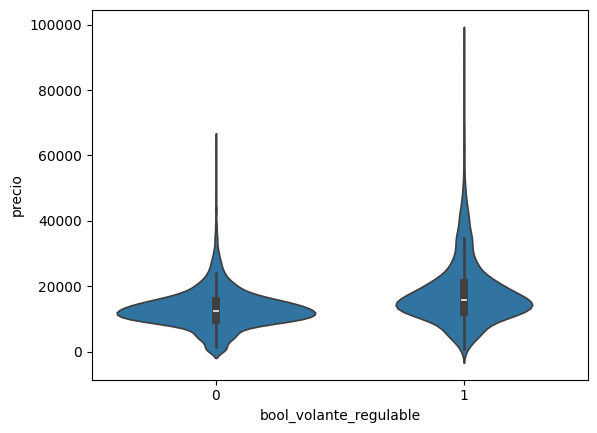

In [943]:
sns.violinplot(x='bool_volante_regulable', y='precio', data=df_bmw5);

## bool_camara_trasera -

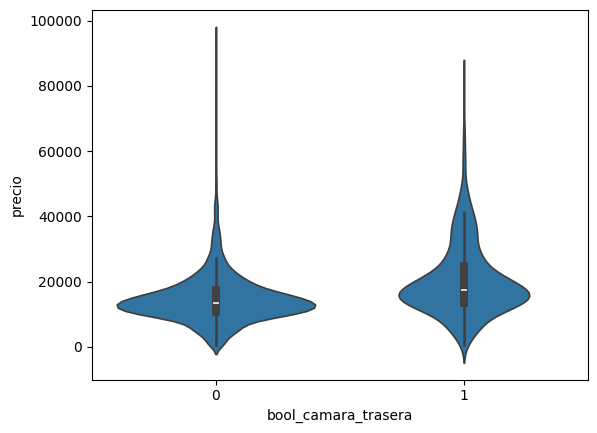

In [944]:
sns.violinplot(x='bool_camara_trasera', y='precio', data=df_bmw5);

## bool_elevalunas_electrico -

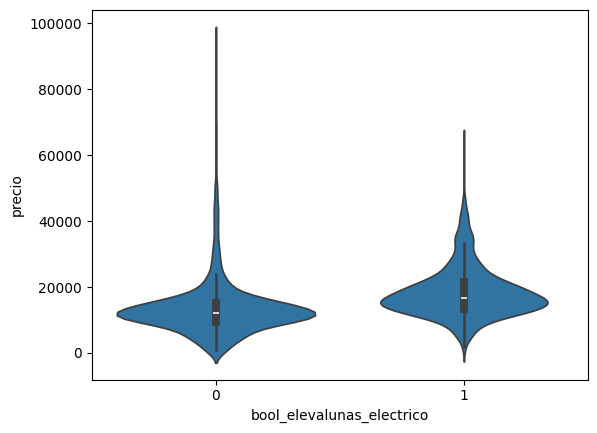

In [945]:
sns.violinplot(x='bool_elevalunas_electrico', y='precio', data=df_bmw5);

# Paso 6 de categóricas a numéricas

Transformación de categóricas a numéricas, ¿Qué variables vas a transformar? ¿Que técnica se va usar?

> *R: las variables categóricas que vamos a tranformar son: ['modelo', 'tipo_gasolina', 'color', 'tipo_coche'] con el método One hot encoding*



## Generar la lista de categóricas

In [946]:
df_bmw6 = df_bmw5.copy()

In [947]:
target = ['precio', 'log_precio']

In [948]:
l_num2, l_bool2, l_cat2 = obtener_lista_variables(df_bmw6)

In [949]:
l_cat2

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [950]:
for i in l_cat2:
  print(i, df_bmw6[i].unique(), '\n')

modelo ['118' 'otros_modelos' '320' '420' '120' '318' '330' '316' '520' '525'
 '530' '535' '320 Gran Turismo' '518' '116' 'X3' '318 Gran Turismo'
 '420 Gran Coupé' '520 Gran Turismo' '730' 'X5' 'X1' 'X4' 'X6'] 

tipo_gasolina ['diesel' 'petrol' 'otras_gasolinas'] 

color ['black' 'grey' 'white' 'otros_colores' 'silver' 'blue' 'sin datos'
 'brown'] 

tipo_coche ['sin datos' 'convertible' 'coupe' 'estate' 'hatchback' 'sedan'
 'subcompact' 'suv' 'van'] 



## One hot encoding

In [951]:
df_bmw6 = pd.get_dummies(data=df_bmw6, columns = l_cat2)

In [952]:
df_bmw6.head()

,km,potencia,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,log_precio,...,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin datos,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,11300.0,1.0,0.5,0.5,1,0,1,4.053078,...,0,0,0,0,0,0,1,0,0,0
1,13929.0,317.0,69700.0,1.0,1.0,1.0,1,0,0,4.843233,...,0,1,0,0,0,0,0,0,0,0
2,183297.0,120.0,10200.0,0.0,0.0,0.0,0,0,1,4.008600,...,1,0,0,0,0,0,1,0,0,0
3,128035.0,135.0,25100.0,1.0,0.5,1.0,1,0,1,4.399674,...,0,1,0,0,0,0,0,0,0,0
4,97097.0,160.0,33400.0,1.0,1.0,1.0,1,0,0,4.523746,...,0,0,0,0,0,0,1,0,0,0


# Paso 7 minmaxscaler

Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

> 1. Potencia, 0.67: la correlación más alta con el precio
2. km, -0.42: es una correlación negativa ya que cuantos más km menor es el precio
3. bool_alreta_lim_velocidad, 0.42



In [953]:
df_bmw7 = df_bmw6.copy()

In [956]:
minMaxResultado = MinMaxScaler()

In [957]:
l_num2

['km', 'potencia']

In [958]:
df_bmw7[l_num2] = minMaxResultado.fit_transform(df_bmw7[l_num2])

In [959]:
df_bmw7.head()

,km,potencia,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,log_precio,...,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin datos,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.352857,0.095238,11300.0,1.0,0.5,0.5,1,0,1,4.053078,...,0,0,0,0,0,0,1,0,0,0
1,0.035149,0.703081,69700.0,1.0,1.0,1.0,1,0,0,4.843233,...,0,1,0,0,0,0,0,0,0,0
2,0.460582,0.151261,10200.0,0.0,0.0,0.0,0,0,1,4.008600,...,1,0,0,0,0,0,1,0,0,0
3,0.321770,0.193277,25100.0,1.0,0.5,1.0,1,0,1,4.399674,...,0,1,0,0,0,0,0,0,0,0
4,0.244058,0.263305,33400.0,1.0,1.0,1.0,1,0,0,4.523746,...,0,0,0,0,0,0,1,0,0,0


In [960]:
corr2 = df_bmw7.corr(numeric_only = True)

In [961]:
corr2.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,log_precio,modelo_116,modelo_118,modelo_120,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_525,modelo_530,modelo_535,modelo_730,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6,modelo_otros_modelos,tipo_gasolina_diesel,tipo_gasolina_otras_gasolinas,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_grey,color_otros_colores,color_silver,color_sin datos,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_sin datos,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,-0.041834,-0.427298,0.024375,-0.024650,-0.026235,0.073661,0.003424,0.057290,-0.434842,-0.110153,-0.028661,-0.009146,0.002773,0.063391,0.008988,0.100834,-0.017712,-0.010360,-0.090018,-0.084335,0.031876,0.093712,-0.002505,0.095078,0.075563,0.028887,0.015656,-0.057701,-0.031176,-0.099783,-0.035954,-0.026187,-0.143262,0.051455,-0.050892,-0.040331,0.039846,-0.026081,-0.019398,0.027217,-0.013515,0.024762,0.000651,-0.067534,-0.033952,-0.051109,0.138782,-0.097249,0.061579,-0.003263,-0.029994,-0.088706,-0.072967
potencia,-0.041834,1.000000,0.675735,0.177740,0.458965,0.211948,0.325212,0.312736,0.341020,0.537183,-0.319899,-0.116267,0.007001,-0.255478,-0.260938,-0.100181,-0.033106,0.013541,0.121738,0.007068,0.008634,-0.079499,-0.015360,-0.004679,0.116748,0.270396,0.248724,0.103589,-0.117812,0.042106,0.062715,0.346488,0.207570,0.342280,-0.129258,0.030735,0.125251,0.034260,-0.010742,-0.055470,0.003274,-0.022185,0.012882,-0.006553,0.006594,0.020907,0.106887,-0.043867,-0.178922,0.032040,-0.011836,-0.135099,0.196588,-0.043397
precio,-0.427298,0.675735,1.000000,0.244354,0.428613,0.202395,0.281235,0.259184,0.273709,0.859984,-0.200667,-0.124716,-0.034187,-0.139321,-0.200337,-0.016217,-0.176375,0.027275,0.008000,0.089279,0.082194,0.008864,-0.003594,0.034644,-0.001992,0.084363,0.087246,0.075874,-0.087553,0.072938,0.174952,0.380966,0.206004,0.283204,0.004697,0.094843,-0.028204,0.031870,-0.033743,-0.008668,-0.018505,-0.016884,-0.025032,-0.009206,0.058540,0.008756,0.094871,-0.171859,-0.097909,0.020047,-0.014838,-0.089627,0.277327,-0.010484
bool_aire_acondicionado,0.024375,0.177740,0.244354,1.000000,0.191325,0.110372,0.288991,0.131311,0.260059,0.319741,-0.153054,-0.094650,-0.043957,-0.030553,0.010266,0.026656,-0.051849,0.006397,-0.011765,-0.018477,0.023638,0.035830,0.145912,0.021931,0.047524,0.067286,0.038426,0.030075,-0.124083,-0.002530,0.019109,0.078793,0.043140,0.011990,0.082003,0.011762,-0.087167,0.037690,0.004073,0.055230,0.021957,-0.034051,-0.039289,-0.044166,-0.047700,-0.037290,-0.039238,0.080326,-0.063025,0.060594,-0.023828,-0.102021,-0.016306,0.000068
bool_alerta_lim_velocidad,-0.024650,0.458965,0.428613,0.191325,1.000000,0.101859,0.200571,0.178506,0.317331,0.414283,-0.252435,-0.109157,-0.033450,-0.142512,-0.172662,-0.040844,-0.014557,0.052779,0.048046,0.006874,0.023341,0.042863,0.076336,0.063260,0.129074,0.132774,0.083778,0.075496,-0.063319,0.067230,0.060242,0.173295,0.080136,0.079624,0.009166,0.029257,-0.016630,0.044486,-0.013501,-0.026948,-0.013342,-0.030953,0.009752,-0.027708,0.020932,-0.006532,0.021271,-0.009067,-0.132851,0.032287,-0.001149,-0.118839,0.127601,-0.015245
bool_bool_bluetooth,-0.026235,0.211948,0.202395,0.110372,0.101859,1.000000,0.125046,0.136689,0.235641,0.190056,-0.050009,0.015761,0.011064,-0.086510,-0.037965,0.022535,0.002430,0.041684,0.041653,0.075347,0.026121,-0.044483,-0.037138,-0.025860,0.009131,0.044088,0.062987,-0.039111,-0.082895,0.032133,0.007055,0.028619,0.022117,0.111143,-0.029475,-0.006425,0.031872,0.031327,0.007672,-0.051940,-0.033908,0.013065,-0.027288,-0.019870,0.066384,0.032892,0.089923,-0.016103,0.029451,-0.012705,-0.015140,-0.055935,0.011650,-0.016091
bool_volante_regulabl

#Paso 8 Excel

In [962]:
df_bmw7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4798 entries, 0 to 4842
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   km                             4798 non-null   float64
 1   potencia                       4798 non-null   float64
 2   precio                         4798 non-null   float64
 3   bool_aire_acondicionado        4798 non-null   float64
 4   bool_alerta_lim_velocidad      4798 non-null   float64
 5   bool_bool_bluetooth            4798 non-null   float64
 6   bool_volante_regulable         4798 non-null   int64  
 7   bool_camara_trasera            4798 non-null   int64  
 8   bool_elevalunas_electrico      4798 non-null   int64  
 9   log_precio                     4798 non-null   float64
 10  modelo_116                     4798 non-null   uint8  
 11  modelo_118                     4798 non-null   uint8  
 12  modelo_120                     4798 non-null   u

In [963]:
df_50filas = df_bmw7.loc[:49,:]

In [964]:
#Pasar a excel las primeras 50 filas
df_50filas.to_excel('/content/drive/MyDrive/Nuclio/M3. Data Analytics y Business Intelligence/Entregable 1/bmw_final.xlsx')